In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Lucas Panfilo Donaire #
# NUSP : 12556552 #
# Turma: 2024145 #
# Prof.: Ronaldo #
##################################################################

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.pyplot import imread
from cv2 import imwrite
import scipy # para convolucao

In [3]:
nomes_imgs = os.listdir('images')
images = {idx: imread(f'images\\{nomes_imgs[idx]}') for idx in range(len(nomes_imgs))}
# Já conferi os tamanhos e não precisei reduzir.

In [4]:
def show(image,title=''):
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.show()

## Tabela sumária das classes

In [5]:
def get_infos(nome_image):
    divisao = nome_image.split(').jpg')[0].split(')_')
    classes = divisao[0].split('(')[1].split(',')
    objetos = divisao[1].split('(')[1].split(',')
    fundo = divisao[2].split('(')[1]
    casa = divisao[3].split('(')[1]
    dia = divisao[4].split('(')[1]
    return [classes, objetos, fundo, casa, dia]

def get_rows(nome_image, idx_image):
    rows = []
    classes, objetos, fundo, casa, dia = get_infos(nome_image)
    for i,item in enumerate(classes):
        rows.append([idx_image, item, item+objetos[i], fundo, casa, dia])
    return rows

colunas = ['Idx Foto','Classe','Objeto','Fundo','Casa','Dia']
rows = []
for idx, image in enumerate(nomes_imgs):
    rows.extend(get_rows(image, idx))
df_images = pd.DataFrame(rows, columns=colunas)
df_images['Iluminação'] = df_images['Casa'].map({'True':'Casa ','False':'Fora '}) + df_images['Dia'].map({'True':'Dia','False':'Noite'})
df_images['Fundo_Iluminação'] = df_images['Fundo'] + ' '+ df_images['Iluminação']
df_images['Objeto_Fundo_Iluminação'] = df_images['Objeto'] + ' '+df_images['Fundo'] + ' '+ df_images['Iluminação']

def get_class_detais(df_images):
    classes = df_images['Classe'].unique()
    df_rows = []
    for classe in classes:
        df_classe = df_images[df_images['Classe']==classe]
        row = [
            classe,
            len(df_classe['Objeto'].unique()),
            len(df_classe['Fundo'].unique()),
            str(df_classe['Fundo'].unique())[1:-1].replace('\n',''),
            len(df_classe['Iluminação'].unique()),
            str(df_classe['Iluminação'].unique())[1:-1].replace('\n',''),
            df_classe.groupby('Objeto_Fundo_Iluminação').count()['Idx Foto'].min(), # minimo de repeticoes | pois todos devem ter ao menos 3 repeticoes (e nessa base, todos tem 3 de fato, como já mostrado acima)
            len(df_classe)
        ]
        df_rows.append(row)
    return pd.DataFrame(df_rows, columns=['Classe','Num_Objetos','Num_Fundos','Fundos','Num_Iluminações','Iluminações','Repetições','Total de amostras'])

In [6]:
get_class_detais(df_images)

,Classe,Num_Objetos,Num_Fundos,Fundos,Num_Iluminações,Iluminações,Repetições,Total de amostras
0,Caderno,1,4,'Cama' 'Varanda' 'Bancada' 'Mesa',4,'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite',3,12
1,Caneta,1,4,'Cama' 'Varanda' 'Bancada' 'Mesa',4,'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite',3,12
2,Quadro,2,4,'Cama' 'Varanda' 'Mesa' 'Bancada',4,'Casa Dia' 'Fora Dia' 'Casa Noite' 'Fora Noite',3,24
3,Camera,1,3,'Cama' 'Mesa' 'Varanda',4,'Casa Dia' 'Casa Noite' 'Fora Dia' 'Fora Noite',3,12
4,Pulseira,1,3,'Varanda' 'Cama' 'Mesa',4,'Fora Dia' 'Fora Noite' 'Casa Dia' 'Casa Noite',3,12
5,Desodorante,1,3,'Bancada' 'Cama' 'Mesa',4,'Fora Noite' 'Fora Dia' 'Casa Dia' 'Casa Noite',3,12
6,Copo,1,3,'Bancada' 'Mesa' 'Cama',4,'Fora Noite' 'Casa Noite' 'Fora Dia' 'Casa Dia',3,12
7,Fone,1,4,'Bancada' 'Mesa' 'Cama' 'Varanda',4,'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite',3,12
8,Celular,1,4,'Bancada' 'Mesa' 'Cama' 'Varanda',4,'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite',3,12
9,Livro,2,4,'Cama' 'Varanda' 'Bancada' 'Mesa',4,'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite',3,24


## Parte 1

In [7]:
df_images # tabela para usar os metadados mais facilmente.

,Idx Foto,Classe,Objeto,Fundo,Casa,Dia,Iluminação,Fundo_Iluminação,Objeto_Fundo_Iluminação
0,0,Caderno,Caderno1,Cama,True,True,Casa Dia,Cama Casa Dia,Caderno1 Cama Casa Dia
1,0,Caneta,Caneta1,Cama,True,True,Casa Dia,Cama Casa Dia,Caneta1 Cama Casa Dia
2,0,Quadro,Quadro1,Cama,True,True,Casa Dia,Cama Casa Dia,Quadro1 Cama Casa Dia
3,0,Camera,Camera1,Cama,True,True,Casa Dia,Cama Casa Dia,Camera1 Cama Casa Dia
4,1,Caderno,Caderno1,Varanda,False,True,Fora Dia,Varanda Fora Dia,Caderno1 Varanda Fora Dia
...,...,...,...,...,...,...,...,...,...
139,30,Camera,Camera1,Varanda,False,False,Fora Noite,Varanda Fora Noite,Camera1 Varanda Fora Noite
140,31,Livro,Livro2,Bancada,False,True,Fora Dia,Bancada Fora Dia,Livro2 Bancada Fora Dia
141,31,Fone,Fone1,Bancada,False,True,Fora Dia,Bancada Fora Dia,Fone1 Bancada Fora Dia
142,31,Quadro,Quadro2,Bancada,False,True,Fora Dia,Bancada Fora Dia,Quadro2 Bancada Fora Dia


In [8]:
def get_iluminacao(idx_image): # retornar iluminação com base no indice da imagem, para definir hiperparametros
    return df_images[df_images['Idx Foto']==idx_image]['Iluminação'].values[0]

In [9]:
def augmentation_RGB2Gray(image):
    rgb_gray = [0.2989, 0.5870, 0.1140]
    return np.dot(image, rgb_gray)

In [10]:
images_gray = {key:augmentation_RGB2Gray(value) for key,value in images.items()}

In [11]:
def scale_gray(image): # reescala
  image_i = image - image.min()
  return np.ceil(255*(image_i/image_i.max()))

def convolve(image, kernel): # convolução
  return scale_gray(scipy.ndimage.convolve(image, kernel,mode='constant'))

In [12]:
########################################### contrast stretching

def augmentation_contrast_stretching_raw(image, r1, r2, s1, s2):
    a1 = s1/r1
    a2 = (s2-s1)/(r2-r1)
    b2 = s1 - a2*r1
    a3 = (255-s2)/(255-r2)
    b3 = s2 - a3*r2
    def f_int(value): # função que será aplicada a cada pixel
        if value < r1:
            return value*a1
        elif value < r2:
            return value*a2 + b2
        else:
            return value*a3 + b3
    return np.array([np.array([f_int(item) for item in row]) for row in image])

def augmentation_contrast_stretching(image, idx_image):
    dicio_params_for_iluminacao = {
        # muda de leve para cada iluminação
        'Casa Dia': {'r1':90,'r2':130,'s1':60,'s2':160}, 
        'Fora Dia': {'r1':80,'r2':120,'s1':50,'s2':150}, 
        'Fora Noite': {'r1':90,'r2':120,'s1':60,'s2':150}, 
        'Casa Noite': {'r1':80,'r2':130,'s1':50,'s2':160},
    }
    params = dicio_params_for_iluminacao[get_iluminacao(idx_image)]
    return augmentation_contrast_stretching_raw(image,**params)


########################################### log

def augmentation_log_raw(image, c):
    log_image = c*np.log(image+1)
    return scale_gray(log_image)
def augmentation_log(image, idx_image):
    dicio_params_for_iluminacao = {
        'Casa Dia': {'c':1}, 
        'Fora Dia': {'c':0.8}, 
        'Fora Noite': {'c':1.4}, 
        'Casa Noite': {'c':1.2},
    }
    params = dicio_params_for_iluminacao[get_iluminacao(idx_image)]
    return augmentation_log_raw(image,**params)

########################################### exp

def augmentation_exp_raw(image, c, gamma):
    return scale_gray( c*image**gamma )
def augmentation_exp(image, idx_image):
    dicio_params_for_iluminacao = {
        'Casa Dia': {'c':1,'gamma':1}, 
        'Fora Dia': {'c':1,'gamma':1}, 
        'Fora Noite': {'c':1,'gamma':1}, 
        'Casa Noite': {'c':1,'gamma':1},
    }
    params = dicio_params_for_iluminacao[get_iluminacao(idx_image)]
    return augmentation_exp_raw(image,**params)

########################################### laplacian

def augmentation_laplacian(image):
    laplacian_kernel = np.array([[ 0,  1,  0],[ 1, -4,  1],[ 0,  1,  0]])
    return convolve(image, laplacian_kernel)

########################################### mean

def augmentation_convolve_mean(image):
    box_kernel = np.ones((15,15)) # mean box 15x15
    return convolve(image, box_kernel)

## Criar e mostrar Augmented DataSet 

### Criar pastas

In [13]:
notebook_dir = os.getcwd()
new_dir = os.path.join(notebook_dir, 'augmented_images')
for subpasta in ['exp','laplacian','log','mean','stretch','gray']:
    new_dir2 = os.path.join(new_dir,subpasta)
    os.makedirs(new_dir2, exist_ok=True)

### Gerar e salvar imagens

In [14]:
images_stretch = {}
images_log = {}
images_exp = {}
images_laplacian = {}
images_mean = {}
for idx_image, image_gray in images_gray.items():
    ############ contrast stretching
    aug_image_sretch = augmentation_contrast_stretching(image_gray, idx_image)
    imwrite(f'augmented_images\\stretch\\Image{idx_image}.jpg', aug_image_sretch)
    images_stretch[idx_image] = aug_image_sretch
    ############ exp
    aug_image_exp = augmentation_exp(image_gray, idx_image)
    imwrite(f'augmented_images\\exp\\Image{idx_image}.jpg', aug_image_exp)
    images_exp[idx_image] = aug_image_exp
    ############ log
    aug_image_log = augmentation_log(image_gray, idx_image)
    imwrite(f'augmented_images\\log\\Image{idx_image}.jpg', aug_image_log)
    images_log[idx_image] = aug_image_log
    ############ laplacian
    aug_image_laplacian = augmentation_laplacian(image_gray)
    imwrite(f'augmented_images\\laplacian\\Image{idx_image}.jpg', aug_image_laplacian)
    images_laplacian[idx_image] = aug_image_laplacian
    ############ mean
    aug_image_mean = augmentation_convolve_mean(image_gray)
    imwrite(f'augmented_images\\mean\\Image{idx_image}.jpg', aug_image_mean)
    images_mean[idx_image] = aug_image_mean
    ############ gray - só salvar
    imwrite(f'augmented_images\\gray\\Image{idx_image}.jpg', image_gray)

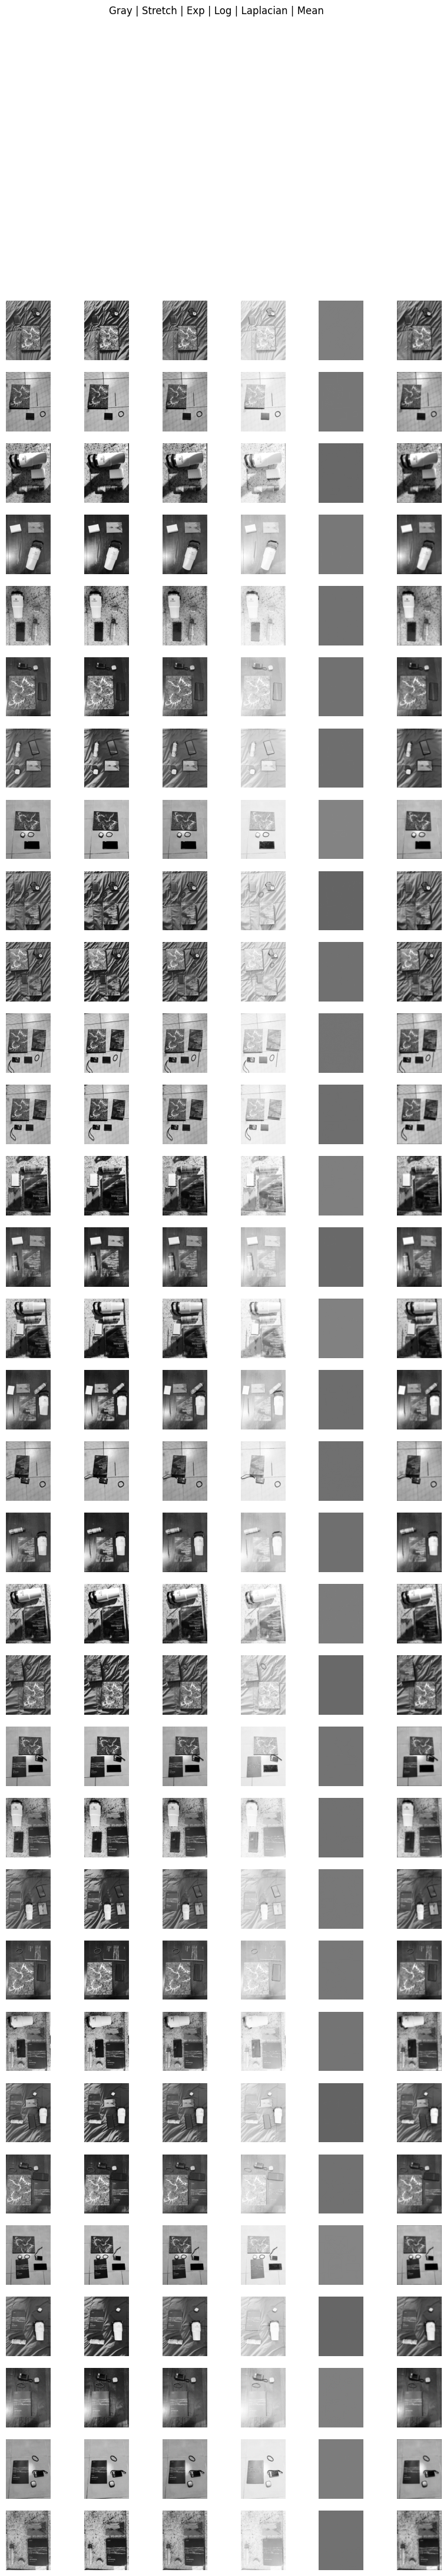

In [15]:
num_rows = len(images_gray)
num_cols = 6
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 50))
plt.suptitle('Gray | Stretch | Exp | Log | Laplacian | Mean')
for i, ax in enumerate(ax.flat):
    image_idx = i // 6
    transform = i % 6
    image = {
        0:images_gray[image_idx],
        1:images_stretch[image_idx],
        2:images_exp[image_idx],
        3:images_log[image_idx],
        4:images_laplacian[image_idx],
        5:images_mean[image_idx],
        }[transform]
    ax.imshow(image, cmap='gray')
    ax.axis('off')
# plt.tight_layout()
plt.show()